In [38]:
import numpy as np 
import pandas as pd 

In [39]:
df = pd.read_csv('laptop_price_processed.csv')

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ["Company", "TypeName", "OpSys", "Cpu_Brand", "Cpu_Series", "Gpu_Manufacturer", "Gpu_Series", "Memory_Type", "Product_Series"]

le = LabelEncoder()

for col in categorical_col:
  df[col] = le.fit_transform(df[col])

In [41]:
from sklearn.preprocessing import MinMaxScaler

numeric_col = ["Inches", "Ram", "Weight", "IPS_Panel", "Retina_Display", "Touchscreen", "Resolution_X", "Resolution_Y", "Clock_Speed", "Memory_Size(GB)", 'Total_Pixels']

minmax = MinMaxScaler()

for col in numeric_col:
  df[col] = minmax.fit_transform(df[[col]])

In [42]:
# X = df.drop(columns=['laptop_ID', 'Price_euros', 'IPS_Panel', 'Resolution_Y', 'Memory_Size(GB)', 'Inches', 'Total_Pixels', 'Company', 'Product_Series'])
# y = df['Price_euros']

In [43]:
X= df.drop(columns=['laptop_ID', 'Price_euros'])
y = df['Price_euros']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [45]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.7731493626116953


Text(0.5, 1.0, 'Coeficient Importance for Linear Regression model')

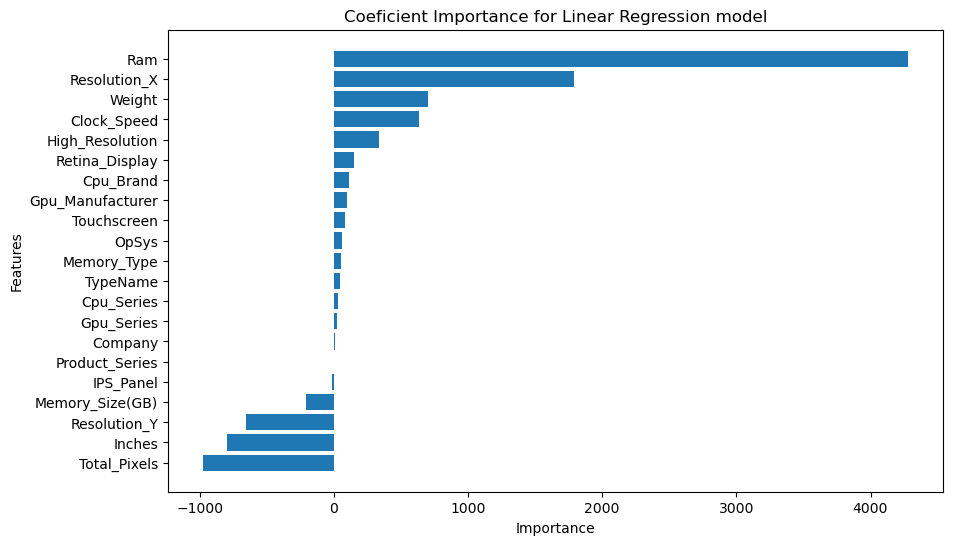

In [47]:
coeficient = lr_model.coef_

importance_df = pd.DataFrame({
  'Features' : X.columns,
  'Importance' : coeficient
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Features'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Coeficient Importance for Linear Regression model')

In [48]:
from sklearn.feature_selection import VarianceThreshold

threshold = VarianceThreshold(threshold=0.2)
threshold.fit(X)
threshold.get_support()

array([ True,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True, False])

In [49]:
X.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'IPS_Panel',
       'Retina_Display', 'Touchscreen', 'Resolution_X', 'Resolution_Y',
       'Total_Pixels', 'High_Resolution', 'Product_Series', 'Cpu_Brand',
       'Cpu_Series', 'Clock_Speed', 'Gpu_Manufacturer', 'Gpu_Series',
       'Memory_Type', 'Memory_Size(GB)'],
      dtype='object')

In [50]:
from sklearn.feature_selection import SelectFromModel

feature_names = X.columns

model = SelectFromModel(lr_model, prefit=True)
# X_new = model.transform(X_train)

# features = X.columns
# print("Selected Features:", features[model.get_support()])

selected_features = feature_names[model.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Inches', 'Ram', 'Weight', 'Resolution_X', 'Resolution_Y',
       'Total_Pixels', 'Clock_Speed'],
      dtype='object')


In [51]:
from sklearn.feature_selection import RFE

rfe = RFE(lr_model, n_features_to_select=5)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.6997584374387524


In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(lr_model, k_features='best', n_jobs=-1, forward=True)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 21),
                          n_jobs=-1, scoring='r2')

In [53]:
features = list(sfs.k_feature_names_)
features

['Company',
 'TypeName',
 'Inches',
 'Ram',
 'OpSys',
 'Weight',
 'Retina_Display',
 'Resolution_X',
 'Resolution_Y',
 'Total_Pixels',
 'High_Resolution',
 'Product_Series',
 'Cpu_Brand',
 'Cpu_Series',
 'Clock_Speed',
 'Gpu_Manufacturer',
 'Gpu_Series',
 'Memory_Type',
 'Memory_Size(GB)']

In [54]:
X_selected = X_train.loc[:, features]
lr_model.fit(X_selected, y_train)

LinearRegression()

In [55]:
y_pred = lr_model.predict(X_selected)

In [56]:
print(f'Accuracy {r2_score(y_train, y_pred)}')

Accuracy 0.7094242905955862
